In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df  = pd.read_csv("online_retail_II.csv", encoding="latin1")

In [3]:
df.shape

(1067371, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
df.dropna(subset=["Customer ID"],inplace=True)

In [9]:
df.shape

(824364, 8)

In [11]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [14]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [18]:
df = df[~df["Invoice"].astype(str).str.startswith('C')]

In [19]:
df.shape

(805620, 9)

In [20]:
df[df["Quantity"] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price


In [30]:
df["TotalPrice"] = df["Price"] * df["Quantity"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [32]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'TotalPrice'],
      dtype='object')

In [33]:
import sqlite3

conn = sqlite3.connect(':memory:')

df.to_sql('retail_data', conn, index=False, if_exists='replace')
print("Cleaned data loaded into in-memory SQL database.")


Cleaned data loaded into in-memory SQL database.


In [34]:
sql_query_countries = """
SELECT
    Country,
    SUM(TotalPrice) as TotalRevenue
FROM
    retail_data
GROUP BY
    Country
ORDER BY
    TotalRevenue DESC
LIMIT 10;
"""
top_countries_df = pd.read_sql_query(sql_query_countries, conn)

print(top_countries_df)

          Country  TotalRevenue
0  United Kingdom  1.472315e+07
1            EIRE  6.216311e+05
2     Netherlands  5.542323e+05
3         Germany  4.312625e+05
4          France  3.552575e+05
5       Australia  1.699681e+05
6           Spain  1.091785e+05
7     Switzerland  1.003653e+05
8          Sweden  9.154972e+04
9         Denmark  6.986219e+04


In [35]:
sql_query_customers = """
SELECT
    "Customer ID",
    SUM(TotalPrice) as TotalSpending
FROM
    retail_data
GROUP BY
    "Customer ID"
ORDER BY
    TotalSpending DESC
LIMIT 10;
"""
top_customers_df = pd.read_sql_query(sql_query_customers, conn)
print("\n--- Top 10 Customers by Spending ---")
print(top_customers_df)


--- Top 10 Customers by Spending ---
   Customer ID  TotalSpending
0      18102.0      608821.65
1      14646.0      528602.52
2      14156.0      313946.37
3      14911.0      295972.63
4      17450.0      246973.09
5      13694.0      196482.81
6      17511.0      175603.55
7      16446.0      168472.50
8      16684.0      147142.77
9      12415.0      144458.37


In [36]:
conn.close()
print("\n Database connection closed.")



 Database connection closed.


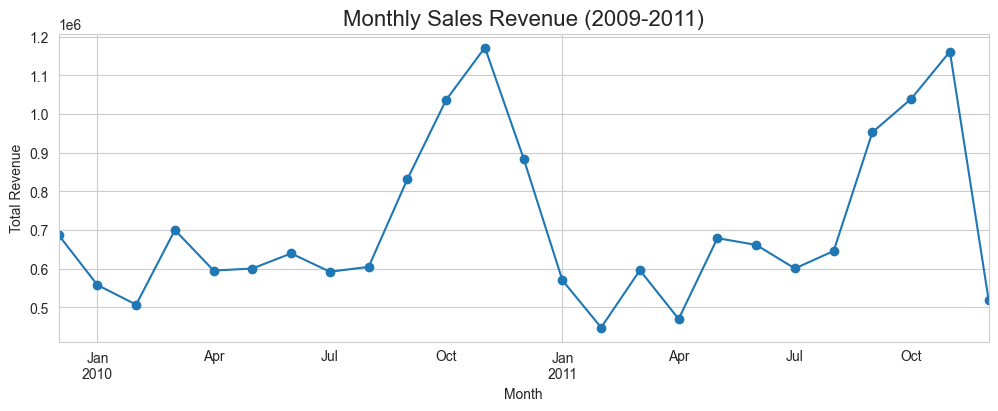

In [43]:
# --- Visualization 1: Sales Trends Over Time (Monthly Revenue) ---
# To analyze trends, we resample the data by month ('M') and sum the 'TotalPrice'.
# We set 'InvoiceDate' as the index to perform this time-series aggregation.

sns.set_style("whitegrid")
plt.figure(figsize=(12,4))
monthly_revenue = df.set_index('InvoiceDate')['TotalPrice'].resample('ME').sum()

monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Sales Revenue (2009-2011)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


C:\Users\abc\AppData\Local\Temp\ipykernel_23208\3553720124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product.values , y=top_product.index,palette='viridis')


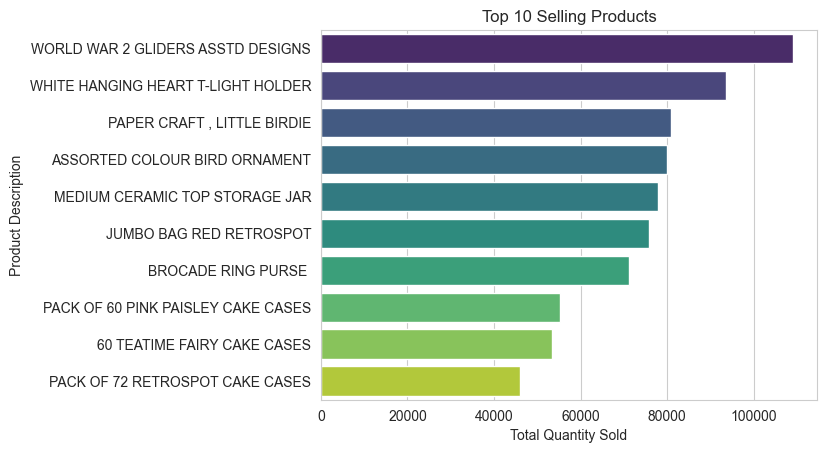

In [50]:
# --- Visualization 2: Top 10 Selling Products ---
# Group by product 'Description' and sum the 'Quantity' to find the most sold items.

top_product = df.groupby("Description")["Quantity"].sum().nlargest(10)
top_product

sns.barplot(x=top_product.values , y=top_product.index,palette='viridis')
plt.title("Top 10 Selling Products")
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')

plt.show()

C:\Users\abc\AppData\Local\Temp\ipykernel_23208\3160924617.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalRevenue', y='Country', data=top_countries_df, palette='plasma')


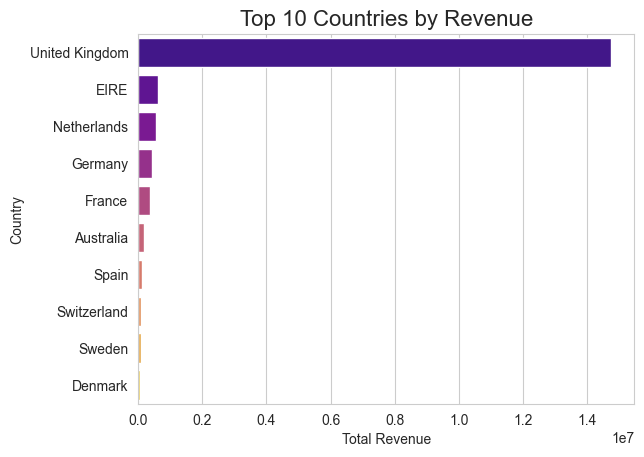

In [51]:
# --- Visualization 3: Top Countries by Revenue (Visualizing the SQL result) ---
# We can now visualize the result we got from our SQL query earlier.

sns.barplot(x='TotalRevenue', y='Country', data=top_countries_df, palette='plasma')
plt.title('Top 10 Countries by Revenue', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

In [52]:
# ---------------------------------------------------------------------------
# PHASE 3: CUSTOMER SEGMENTATION WITH RFM & K-MEANS
# ---------------------------------------------------------------------------

In [53]:
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [54]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [55]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [57]:
# Group data by 'Customer ID' and calculate R, F, M
rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,  # Recency: days since last purchase
    'Invoice': 'nunique',                                      # Frequency: count of unique invoices
    'TotalPrice': 'sum'                                          # Monetary: total sum of purchases
})

In [59]:
rfm_df.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,326,12,77556.46
12347.0,2,8,5633.32
12348.0,75,5,2019.40
12349.0,19,4,4428.69
12350.0,310,1,334.40


In [61]:
rfm_df.shape

(5881, 3)

In [62]:
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'Invoice': 'Frequency',
                       'TotalPrice': 'Monetary'}, inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,2,8,5633.32
12348.0,75,5,2019.40
12349.0,19,4,4428.69
12350.0,310,1,334.40


In [63]:
# --- 2. Preprocess RFM Data for Clustering ---
# K-Means is sensitive to the scale of data and works best with normally distributed data.
# We will check for skewness and apply a log transform, then scale the data.

In [64]:
# Check for skewness
print("Skewness of RFM features:")
print(rfm_df.skew())

Skewness of RFM features:
Recency       0.886792
Frequency    12.653997
Monetary     25.320187
dtype: float64


In [65]:
# The features are highly skewed. Apply a log transformation to reduce skewness.
# We add 1 to each value to handle any potential zero values in Frequency or Monetary.
rfm_log_transformed = rfm_df.apply(lambda x: np.log(x + 1))

In [66]:
# Scale the data using StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log_transformed)

In [67]:
# Convert the scaled array back to a DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm_df.columns, index=rfm_df.index)


In [68]:
rfm_scaled_df.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,0.856321,1.254938,3.170387
12347.0,-2.151924,0.800635,1.291999
12348.0,-0.079383,0.299705,0.557317
12349.0,-0.935429,0.074457,1.119681
12350.0,0.824152,-1.057568,-0.729063


In [71]:
# --- 3. Determine the Optimal Number of Clusters (Elbow Method) ---
# Using the Elbow Method to find the optimal number of clusters

# Calculate the Within-Cluster Sum of Squares (WCSS) for a range of cluster numbers
wcss = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(rfm_scaled_df)
    wcss[k] = kmeans.inertia_  # inertia_ is the WCSS

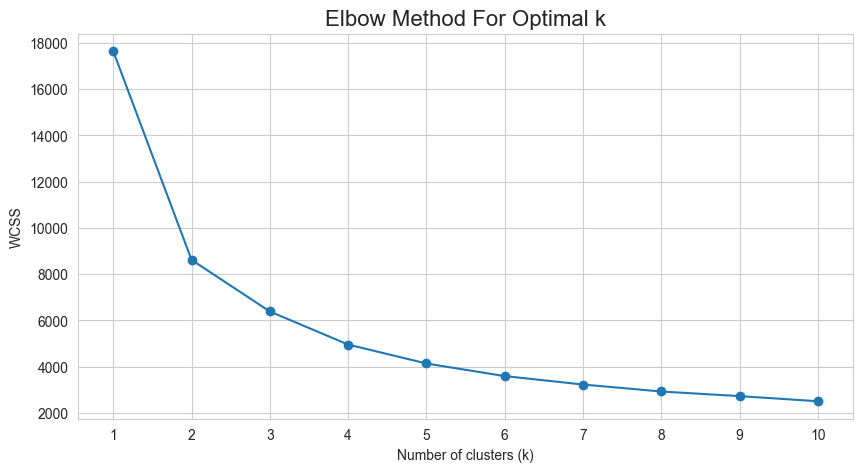

In [72]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(list(wcss.keys()), list(wcss.values()), 'o-')
plt.title('Elbow Method For Optimal k', fontsize=16)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [73]:
# Build the K-Means model with the optimal number of clusters (k=4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=42)
# Fit the model and predict the cluster for each customer
rfm_df['Segment'] = kmeans.fit_predict(rfm_scaled_df)

In [75]:
# --- Analyze the Customer Segments ---
print("Analyzing the characteristics of each customer segment...")

# Calculate the average RFM values for each segment
segment_analysis = rfm_df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

print(segment_analysis)

Analyzing the characteristics of each customer segment...
         Recency  Frequency  Monetary
Segment                              
0           28.6        3.0     853.5
1          395.3        1.4     346.9
2           25.5       19.9   11387.0
3          212.6        5.4    2141.4


In [76]:
# Interpret and name the segments based on their characteristics
# For example:
# Low Recency, High Frequency, High Monetary -> Champions
# High Recency, Low Frequency, Low Monetary -> At-Risk / Lost
# Low Recency, Low Frequency, Low Monetary -> New Customers / Potential
# Mid-range values -> Potential Loyalists

In [77]:
# ---------------------------------------------------------------------------
# PHASE 4: CHURN PREDICTION
# ---------------------------------------------------------------------------


In [81]:
# Import the necessary libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [82]:

# We define a "churned" customer as someone who has not made a purchase in the last 90 days.
# create a new 'Churn' column: 1 for churned, 0 for not churned.

recency_threshold = 90
rfm_df['Churn'] = rfm_df['Recency'].apply(lambda x: 1 if x > recency_threshold else 0)


In [83]:
rfm_df.head()

,Recency,Frequency,Monetary,Segment,Churn
Customer ID,,,,,
12346.0,326,12,77556.46,2,1
12347.0,2,8,5633.32,2,0
12348.0,75,5,2019.40,3,0
12349.0,19,4,4428.69,0,0
12350.0,310,1,334.40,1,1


In [84]:
print(rfm_df['Churn'].value_counts())

Churn
1    2991
0    2890
Name: count, dtype: int64


In [94]:
X = rfm_df[['Frequency', 'Monetary']]
y = rfm_df['Churn']

In [95]:
# --- 3. Split Data into Training and Testing Sets ---
# `stratify=y` ensures that the proportion of churned vs. non-churned customers
# is the same in both the train and test sets, which is important for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)

X_train shape (4704, 2)
y_train shape (4704,)


In [96]:
# --- 4. Handle Class Imbalance using SMOTE ---
# As seen in the Churn distribution, we have more non-churned customers.
# We will apply SMOTE *only on the training data* to create a balanced training set.
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("SMOTE applied successfully.")
print("Original training set distribution:\n", y_train.value_counts())
print("SMOTE-balanced training set distribution:\n", y_train_smote.value_counts())
print("-" * 30)

SMOTE applied successfully.
Original training set distribution:
 Churn
1    2392
0    2312
Name: count, dtype: int64
SMOTE-balanced training set distribution:
 Churn
1    2392
0    2392
Name: count, dtype: int64
------------------------------


In [97]:
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(max_depth=10, random_state=42)

In [98]:
y_pred = model.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.2f}")



Model Accuracy on Test Set: 0.70



Confusion Matrix:


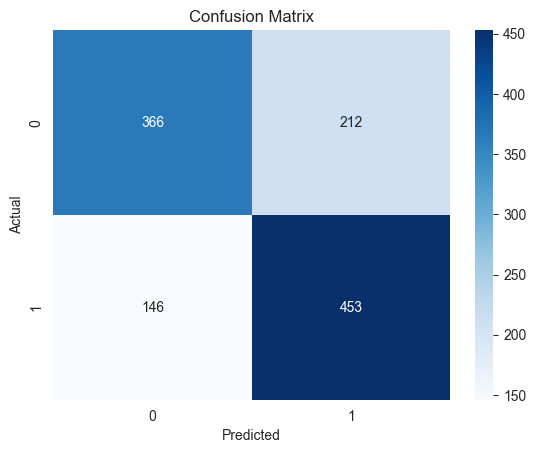

In [100]:
print("\nConfusion Matrix:")
# Use seaborn for a prettier confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [101]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       578
           1       0.68      0.76      0.72       599

    accuracy                           0.70      1177
   macro avg       0.70      0.69      0.69      1177
weighted avg       0.70      0.70      0.69      1177



In [102]:
# Predict the probability of churn (class 1) for every customer in our original dataset
churn_probabilities = model.predict_proba(X)[:, 1]

# Add the probabilities and the final 0/1 prediction as new columns
rfm_df['ChurnProbability'] = churn_probabilities
rfm_df['PredictedChurn'] = model.predict(X)

print("Churn probabilities and predictions have been added.")
print("\nFinal DataFrame sample with new prediction columns:")
print(rfm_df.head())
print("-" * 30)

Churn probabilities and predictions have been added.

Final DataFrame sample with new prediction columns:
             Recency  Frequency  Monetary  Segment  Churn  ChurnProbability  \
Customer ID                                                                   
12346.0          326         12  77556.46        2      1          0.231325   
12347.0            2          8   5633.32        2      0          0.209009   
12348.0           75          5   2019.40        3      0          0.282512   
12349.0           19          4   4428.69        0      0          0.234438   
12350.0          310          1    334.40        1      1          0.842677   

             PredictedChurn  
Customer ID                  
12346.0                   0  
12347.0                   0  
12348.0                   0  
12349.0                   0  
12350.0                   1  
------------------------------


In [103]:
# Export the final segmented and scored data to a CSV file
rfm_df.to_csv('ecommerce_customer_segments.csv', index=True)
print("Data exported successfully for dashboarding.")

Data exported successfully for dashboarding.


# From Insights to Action with Generative AI
#### With our customer segments defined and our churn model built, the final step is to translate these data-driven insights into actionable business strategies. We leverage a Generative AI model (Google's Gemini) as a creative partner to brainstorm targeted marketing campaigns for our key customer personas.

##### Segment 0: Champions: Our best customers. Highly frequent, recent, and high-spending.
##### Segment 1: At-Risk Loyalists: High-value customers who haven't purchased in a long time and are likely to churn.
##### Segment 2: New & Promising: New or occasional shoppers with potential for growth.
##### Segment 3: Potential Loyalists: Consistent customers who can be nurtured into Champions.

#### Our strategic focus will be on retaining the "At-Risk Loyalists" and rewarding our "Champions".

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Generating Campaigns for "At-Risk Loyalists"
#### This is our top priority for churn prevention. We provided the AI with a detailed, data-driven prompt to get relevant ideas.
#### My Prompt to Gemini:
###### "Acting as a senior e-commerce marketing strategist, I need to design a campaign to re-engage a high-value customer segment that is at risk of churning.

#### Segment Profile: 'At-Risk Loyalists'
###### They have not purchased in over 150 days (High Recency).
###### They were previously loyal, with an average of 5 past purchases (Good Frequency).
###### They are high-spenders, with an average lifetime value of over $2,100 (High Monetary).
###### Our churn prediction model gives them a >80% probability of churning.
#### Generate three distinct, actionable marketing campaign ideas to win this specific segment back."

#### Gemini's Generated Response:
###### The "Exclusive 'Come Back' Offer": Focus on a high-value, personalized discount (e.g., 30% off) to drive an immediate purchase. The messaging acknowledges their past value: "We've Missed You, [Customer Name]!".
###### The "Status Recognition & VIP Re-engagement": Appeal to their past loyalty by granting them temporary "VIP Gold" status for 3 months upon their next purchase, unlocking perks like free shipping and early access.
###### The "Feedback-First" Campaign: A softer approach that offers a small gift card in exchange for completing a survey about why they've been away. This gathers valuable data while gently re-establishing contact.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Generating Campaigns for "Champions"
#### For our best customers, the goal is retention, increased engagement, and turning them into brand advocates.

#### My Prompt to Gemini:
###### ""Now, for my best customers.

#### Segment Profile:  'Champions'
###### They purchase frequently (average of 13 past purchases) and have bought very recently (average of 16 days ago).
###### They are my highest spenders, with an average lifetime value over $3,500.

#### Generate three marketing ideas to reward their loyalty, increase their lifetime value, and turn them into brand advocates."


#### Gemini's Generated Response:
###### 1.Launch an Exclusive VIP Club: Formalize their status with permanent perks like free express shipping, surprise gifts, and access to limited-edition products.
###### 2.The "Champions" Referral Program: Turn them into advocates by giving them a personalized referral code that benefits both them (store credit) and their friends (a discount).
###### 3.Co-Creation & Insider Feedback Panel: Deepen their brand connection by inviting them to an exclusive panel to vote on new products or get early samples, making them feel like valued insiders.

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [104]:
rfm_df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Segment', 'Churn',
       'ChurnProbability', 'PredictedChurn'],
      dtype='object')